

# Análisis de la Contaminación del Aire en Chile
**Minería de Datos CC5205-1**

Estudiantes:

Juan Pablo Bustamante  
Diego Alonso Carter  
Carolina Navarro P.  
Valentina  
Tomás Vallejo




<h1 style="margin-bottom:0.4em;">Introducción</h1>

<p>En este primer hito del proyecto de Minería de Datos (CC5205-1) nos proponemos <b>explorar y preparar</b> un conjunto de datos reales sobre calidad del aire en Chile, con el objetivo de <b>desarrollar modelos predictivos</b> capaces de anticipar niveles de contaminación atmosférica y <b>emitir alertas tempranas</b> frente a episodios críticos utilizando información histórica y <b>variables meteorológicas</b>. Esta fase inicial busca establecer bases sólidas de curaduría y comprensión de las series temporales para facilitar ciclos posteriores de modelado y evaluación.</p>

<p>Los datos provienen del <b>Sistema de Información Nacional de Calidad del Aire (SINCA)</b> del Ministerio del Medio Ambiente e incluyen mediciones de contaminantes atmosféricos (PM2.5, PM10, SO₂, NO₂, O₃, CO), variables meteorológicas (temperatura, humedad, dirección y velocidad del viento), metadatos temporales (hora del día, día de la semana, estacionalidad), información geográfica de las estaciones de monitoreo y el <b>Índice de Calidad del Aire (ICAP)</b>. Esta combinación permite estudiar <b>patrones espacio-temporales</b>, dependencias entre contaminantes y clima, así como la ocurrencia de <b>episodios críticos</b> por zona geográfica y estación del año.</p>

<p>La motivación se fundamenta en la <b>relevancia sanitaria y ambiental</b> de la contaminación atmosférica en Chile. Un análisis riguroso de estas series temporales puede revelar <b>tendencias</b>, <b>anomalías</b> y factores condicionantes (como patrones de viento y estabilidad atmosférica), habilitando <b>herramientas predictivas</b> que apoyen tanto decisiones individuales (planificación de actividades al aire libre) como de <b>política pública</b> (gestión de episodios críticos, implementación de medidas preventivas y fiscalización ambiental). Además, reconocer la <b>heterogeneidad entre estaciones</b> y distintos contextos urbanos e industriales es fundamental para construir modelos robustos y transferibles.</p>

<p><strong>Los objetivos específicos de este hito incluyen:</strong></p>
<ol>
  <li><strong>Exploración y perfilado</strong> de datos: análisis de distribuciones, identificación de datos faltantes, detección de valores atípicos, evaluación de estacionalidad y autocorrelación.</li>
  <li><strong>Limpieza e imputación</strong> de datos faltantes mediante criterios de calidad, definición de ventanas temporales y aplicación de métodos estadísticos apropiados.</li>
  <li><strong>Integración y sincronización temporal</strong> entre estaciones y variables, incluyendo alineación de resoluciones temporales y coherencia en marcas de tiempo.</li>
  <li><strong>Etiquetado de episodios críticos</strong> basado en ICAP y umbrales normativos para facilitar tareas de clasificación.</li>
  <li><strong>Análisis de relaciones</strong> entre contaminantes y meteorología, así como evaluación de patrones espaciales entre estaciones.</li>
  <li><strong>Definición preliminar</strong> de características y modelos base para regresión (predicción de PM2.5) y clasificación de alertas ambientales.</li>
</ol>

<p>Con esta estructura metodológica establecemos el contexto, caracterizamos los datos disponibles y definimos el alcance del trabajo inicial, preparando las bases para que en etapas posteriores podamos <b>entrenar y validar</b> modelos con resultados <b>confiables y aplicables</b> al contexto nacional.</p>


<h1 style="margin-bottom:0.4em;">Exploración de datos</h1>

<p>En esta etapa inicial recopilamos y organizamos el conjunto de datos de calidad del aire proveniente del <b>Sistema de Información Nacional de Calidad del Aire (SINCA)</b>. El dataset integra información de <b>121 estaciones</b> distribuidas en distintas regiones de Chile, con registros predominantemente <b>horarios</b> que abarcan varios años, lo que proporciona alta densidad temporal y notable heterogeneidad entre estaciones de monitoreo.</p>

<p>Las variables incluyen contaminantes atmosféricos (PM2.5, PM10, SO₂, NO₂, O₃, CO), parámetros meteorológicos (temperatura, humedad relativa, dirección y velocidad del viento) y el <b>Índice de Calidad del Aire (ICAP)</b>. Es importante destacar que no todas las estaciones miden la totalidad de contaminantes o parámetros meteorológicos, y existen <b>cambios de instrumentación</b> y períodos con datos faltantes que generan coberturas desiguales y potenciales inconsistencias en las series temporales.</p>

<p><b>Características principales del dataset identificadas:</b></p>
<ul>
  <li><b>Resolución temporal y cobertura:</b> Series con granularidad horaria (ocasionalmente minutal o diaria), períodos de operación variables por estación y presencia de gaps temporales significativos.</li>
  <li><b>Calidad y completitud de datos:</b> Coexistencia de datos validados, preliminares y no validados; necesidad de detección sistemática de <i>outliers</i> y caracterización de períodos con datos faltantes prolongados.</li>
  <li><b>Estadística descriptiva:</b> Análisis de medianas e IQR para contaminantes particulados; identificación de distribuciones asimétricas y colas pesadas características de episodios de alta contaminación; cálculo de percentiles por estación y mes.</li>
  <li><b>Patrones temporales:</b> Identificación de ciclos diurnos y semanales en PM y gases; análisis de estacionalidad; evaluación de autocorrelación (ACF) y persistencia de episodios contaminantes.</li>
  <li><b>Relaciones bivariadas:</b> Construcción de matrices de correlación contaminante-meteorología (especialmente viento, temperatura y humedad); análisis de <i>scatter plots</i> condicionados por franja horaria y estación del año.</li>
  <li><b>Visualizaciones exploratorias:</b> Generación de histogramas/KDE, gráficos de <i>series temporales</i> con bandas de confianza, <i>boxplots</i> mensuales, <i>heatmaps</i> de correlación y <i>rosas de viento</i> por estación.</li>
</ul>

<p><b>Estrategia de integración y armonización:</b> La diversidad de resoluciones temporales y coberturas exige implementar <b>resampling</b> y armonización temporal (unificación a resolución horaria/diaria manteniendo trazabilidad), además de <b>estandarización de unidades y nomenclatura</b>. El proceso contempla la fusión de tablas mediante claves <code>station_id</code> y <code>timestamp</code>, resolución de registros duplicados y verificación de <b>coherencia en zonas horarias</b>. Para casos con variables meteorológicas faltantes, se evaluará la <b>integración con fuentes externas</b> (reanálisis meteorológicos o redes complementarias) para minimizar sesgos en los análisis.</p>

<p><b>Procesamiento y estandarización realizados:</b> Los datos fueron <b>organizados en un repositorio centralizado</b> y sometidos a limpieza inicial para <b>estandarizar</b> dos categorías principales: <i>datos meteorológicos</i> y <i>datos de contaminación</i>. Se normalizaron nombres de variables, formatos temporales y sistemas de unidades, documentándose la existencia de <b>mediciones a diferentes alturas</b> (ejemplo: viento a 2 m versus 10 m), aspecto que será considerado explícitamente en los análisis posteriores.</p>

<p><b>Enriquecimiento contextual:</b> Se planifica <b>correlacionar</b> las series temporales con <b>eventos ambientales externos</b> (incendios forestales, tormentas de polvo, inversiones térmicas y otros fenómenos meteorológicos extremos) y aprovechar <b>información geoespacial</b> (coordenadas, altitud y características del entorno) para vincular cada estación con su ubicación y contexto territorial específico. Este enriquecimiento mejorará la interpretabilidad de patrones observados y la robustez de los modelos predictivos.</p>

<p>Con esta exploración sistemática caracterizamos la estructura del dataset, identificamos sus limitaciones principales y definimos oportunidades de integración, estableciendo los fundamentos metodológicos para las etapas subsecuentes de análisis estadístico y desarrollo de modelos predictivos.</p>


# Preguntas de Investigación

## 1. Predicción de concentraciones de PM2.5
¿Es posible predecir con precisión la **concentración de PM2.5** a distintos horizontes temporales (t+1h, t+6h, t+24h) utilizando datos históricos y variables meteorológicas?

**Subpreguntas específicas:**
- ¿Cuál horizonte temporal proporciona predicciones más precisas y estables entre estaciones?
- ¿Qué variables (lags de PM2.5, velocidad del viento, humedad relativa, temperatura, variables calendáricas) contribuyen más significativamente a la capacidad predictiva?
- ¿Qué configuración de ventanas temporales (3h, 6h, 24h) mejora el error respecto a modelos de persistencia simple?

## 2. Detección de patrones anómalos
¿Qué **patrones anómalos** se manifiestan en las series horarias de contaminación atmosférica y bajo qué condiciones contextuales ocurren?

**Subpreguntas específicas:**
- ¿Los picos de concentración atípicos coinciden con condiciones de baja ventilación o eventos específicos (incendios, episodios de polvo, feriados)?
- ¿Existe variabilidad en la frecuencia de anomalías según la estación del año o entre días laborales versus fines de semana?
- ¿Qué proporción de anomalías corresponde a fenómenos reales versus ruido instrumental, y cómo identificarlas de forma robusta?

## 3. Impacto de zonas de sacrificio
¿Las estaciones ubicadas dentro o próximas a **zonas de sacrificio ambiental** presentan mayor frecuencia, duración e intensidad de episodios críticos comparadas con estaciones en áreas sin esta designación?

**Subpreguntas específicas:**
- ¿Cómo definir objetivamente la pertenencia (polígonos oficiales versus buffers de 3-5-10 km) y qué estaciones constituyen controles apropiados?
- ¿Cuál es la magnitud de las diferencias en tasas de ocurrencia, duración promedio y intensidad máxima de episodios críticos?
- ¿Persisten estas diferencias al controlar estadísticamente por variables meteorológicas y efectos estacionales?




# Propuesta Experimental
*(Estrategia metodológica)*

Considerando la distribución geográfica de las estaciones de monitoreo a lo largo del territorio nacional, organizamos la información en una estructura jerárquica almacenada en **Google Drive**, donde cada una de las **121 estaciones** cuenta con dos subdirectorios: uno destinado a **parámetros de contaminación atmosférica** y otro para **parámetros meteorológicos**. Esta organización sistemática facilita el preprocesamiento de datos, mantiene la trazabilidad de fuentes y optimiza el posterior desarrollo de modelos predictivos.

## Predicción de concentraciones de PM2.5

Abordamos esta pregunta mediante **modelos de regresión multivariable para series temporales**. El objetivo es anticipar concentraciones futuras de **PM2.5** con horizontes de **1, 6 y 24 horas**, dada su relevancia para **sistemas de alerta temprana** y la implementación oportuna de medidas de control ambiental.

**Metodología de preprocesamiento:**
Posterior a una **limpieza general** (estandarización de formatos fecha/hora, tratamiento de valores faltantes y selección de series con **>5 años** de registro histórico), implementamos un preprocesamiento específico que incluye:

- **Generación de variables objetivo:** Creación de `PM2.5_t+1`, `PM2.5_t+6`, `PM2.5_t+24` mediante desplazamientos temporales apropiados.
- **Partición temporal:** Segmentación en 70% entrenamiento, 15% validación y 15% prueba, manteniendo el orden cronológico para prevenir filtración de información futura.
- **Normalización:** Estandarización de variables continuas y codificación de variables categóricas temporales (estación del año, día de la semana), distinguiéndolas claramente de "estación de monitoreo".

**Evaluación y métricas:**
La **evaluación** empleará **MAE, RMSE y R²**, estableciendo como línea base un **modelo de persistencia** simple. Priorizamos modelos lineales interpretables para cuantificar la **contribución relativa de variables predictoras** (lags de PM2.5, velocidad del viento, humedad relativa, temperatura, variables calendáricas) y validar que superen significativamente la capacidad predictiva de la persistencia, demostrando **valor agregado cuantificable**.

## Detección de anomalías en series temporales

Implementamos la **detección de valores atípicos** mediante una estrategia híbrida que combina **métodos estadísticos clásicos** (rango intercuartílico, puntuaciones z) con **algoritmos de detección basados en aislamiento** (*Isolation Forest*).

La validación de resultados considerará la **proporción temporal** y **contexto ambiental** de las anomalías detectadas, verificando su coincidencia con condiciones de **baja ventilación**, **inversiones térmicas** o **eventos externos** (incendios forestales, tormentas de polvo, días festivos). Este enfoque dual equilibra **eficiencia computacional e interpretabilidad** (estadísticas robustas) con **rigurosidad metodológica** (validación algorítmica independiente).

## Análisis comparativo: estaciones en zonas de sacrificio

Para contrastar estaciones ubicadas **dentro o en proximidad** a **zonas de sacrificio ambiental** con estaciones **control** en áreas comparables, definimos **episodios críticos** como períodos con **PM2.5 > 50 µg/m³** sostenidos durante **≥ 4 horas consecutivas**.

**Metodología de clasificación y análisis:**
- **Criterios de pertenencia:** Identificación mediante **polígonos oficiales** y **buffers concéntricos de 3, 5 y 10 km**.
- **Indicadores cuantitativos:** Construcción de métricas de **frecuencia de episodios, duración promedio y magnitud máxima**.
- **Análisis estadístico:** Implementación de **pruebas de comparación de medias** (t de Student, ANOVA o U de Mann-Whitney, según cumplimiento de supuestos paramétricos) y **modelos de regresión múltiple** para **controlar efectos de covariables meteorológicas y estacionales**.

Este diseño metodológico permite evaluar si persisten diferencias **estadísticamente significativas** entre grupos de estaciones una vez controlados los efectos confundentes del clima y la variabilidad temporal natural.

In [40]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import os
import pandas as pd

base_dir = "/content/drive/MyDrive/Datos"
resultados = []

for estacion in os.listdir(base_dir):
    estacion_path = os.path.join(base_dir, estacion, 'Contaminacion', 'MP 2.5.csv')
    if os.path.isfile(estacion_path):
        df = pd.read_csv(
            estacion_path,
            sep=';',
            usecols=[0, 1, 2, 3, 4],
            skiprows=1,
            names=[
                'fecha',
                'hora',
                'concentracion_de_MP_2_5',
                'concentracion_de_MP_2_5_preliminares',
                'concentracion_de_MP_2_5_no_validados'
            ],
            dtype=str,
            low_memory=False
        )
        # Convertir todas las columnas de concentración a float
        for col in [
            'concentracion_de_MP_2_5',
            'concentracion_de_MP_2_5_preliminares',
            'concentracion_de_MP_2_5_no_validados'
        ]:
            df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce')
        df['nombre_estacion'] = estacion
        resultados.append(df[
            [
                'nombre_estacion',
                'fecha',
                'hora',
                'concentracion_de_MP_2_5',
                'concentracion_de_MP_2_5_preliminares',
                'concentracion_de_MP_2_5_no_validados'
            ]
        ])

tabla_final = pd.concat(resultados, ignore_index=True)

# Desarrollo de la pregunta 1: Modelo de regresión multivariada para la predicción de concentraciones de PM2.5

En esta sección desarrollamos la primera pregunta de investigación:
predecir la concentración horaria de PM2.5 en la estación Coyhaique II
a distintos horizontes temporales (t+1, t+6 y t+24 horas) utilizando
historial de la propia serie y variables calendáricas.

Primero construimos la serie temporal y las variables objetivo, luego
definimos un conjunto de características (lags y calendario), y
finalmente entrenamos y evaluamos modelos de regresión lineal
multivariada comparados con un modelo de persistencia.

**Construcción del índice temporal**

Para iniciar el modelado predictivo, trabajamos inicialmente con la estación Coyhaique II, con el fin de desarrollar y validar el flujo completo sobre una serie temporal limpia y continua.

En esta etapa unificamos las columnas de fecha y hora en un solo timestamp (fecha_hora), lo que permite ordenar los datos cronológicamente y habilita la creación posterior de lags y variables objetivo (t+1, t+6, t+24).

Con esto obtenemos una serie temporal consistente, indispensable para ajustar modelos que dependen del orden temporal y evitar fuga de información futura.

In [42]:
# 1. Tomamos solo una estación de Coyhaique
estacion_objetivo = "Coyhaique II"

df = tabla_final[tabla_final["nombre_estacion"] == estacion_objetivo].copy()

# 2. Aseguramos que 'hora' tenga 4 dígitos (0000, 0100, 2300, etc.)
df["hora"] = df["hora"].astype(str).str.zfill(4)

# 3. Construimos un datetime real
df["fecha_hora_str"] = df["fecha"] + df["hora"]
df["fecha_hora"] = pd.to_datetime(df["fecha_hora_str"], format="%y%m%d%H%M", errors="coerce")

# 4. Ordenamos por tiempo y quitamos filas sin fecha_hora
df = df.dropna(subset=["fecha_hora"]).sort_values("fecha_hora").reset_index(drop=True)

df[["nombre_estacion", "fecha", "hora", "fecha_hora", "concentracion_de_MP_2_5"]].head()


,nombre_estacion,fecha,hora,fecha_hora,concentracion_de_MP_2_5
0,Coyhaique II,130901,0100,2013-09-01 01:00:00,184.0
1,Coyhaique II,130901,0200,2013-09-01 02:00:00,151.0
2,Coyhaique II,130901,0300,2013-09-01 03:00:00,75.0
3,Coyhaique II,130901,0400,2013-09-01 04:00:00,121.0
4,Coyhaique II,130901,0500,2013-09-01 05:00:00,151.0


**Generación de las variables objetivo (t+1, t+6 y t+24)**

Con la serie temporal ya construida, generamos las variables objetivo necesarias para el modelado predictivo: PM2.5 a 1 hora, 6 horas y 24 horas en el futuro. Para asegurar consistencia, trabajamos únicamente con registros validados, eliminando filas con valores faltantes en la concentración oficial de PM2.5.

A partir de esta serie filtrada y ordenada cronológicamente, aplicamos desplazamientos temporales (shifts) para crear las columnas PM25_t+1, PM25_t+6 y PM25_t+24, que representan los valores futuros que el modelo deberá predecir. Los únicos valores faltantes que permanecen corresponden a las últimas observaciones de la serie, donde naturalmente no existe información futura disponible.

In [43]:
# 1. Filtrar datos validados (concentracion_de_MP_2_5 ≠ NaN)
df_validado = df.dropna(subset=["concentracion_de_MP_2_5"]).copy()

# 2. Ordenar por tiempo
df_validado = df_validado.sort_values("fecha_hora").reset_index(drop=True)

# 3. Crear las variables objetivo
df_validado["PM25_t+1"]  = df_validado["concentracion_de_MP_2_5"].shift(-1)
df_validado["PM25_t+6"]  = df_validado["concentracion_de_MP_2_5"].shift(-6)
df_validado["PM25_t+24"] = df_validado["concentracion_de_MP_2_5"].shift(-24)

# Mostrar las primeras filas
print(df_validado[["fecha_hora", "concentracion_de_MP_2_5", "PM25_t+1", "PM25_t+6", "PM25_t+24"]].head(12))

# Mostrar las últimas filas
df_validado[["fecha_hora", "concentracion_de_MP_2_5", "PM25_t+1", "PM25_t+6", "PM25_t+24"]].tail(12)

            fecha_hora  concentracion_de_MP_2_5  PM25_t+1  PM25_t+6  PM25_t+24
0  2013-09-01 01:00:00                    184.0     151.0     147.0      109.0
1  2013-09-01 02:00:00                    151.0      75.0     134.0       39.0
2  2013-09-01 03:00:00                     75.0     121.0      78.0       29.0
3  2013-09-01 04:00:00                    121.0     151.0      61.0       13.0
4  2013-09-01 05:00:00                    151.0     159.0      88.0       23.0
5  2013-09-01 06:00:00                    159.0     147.0      88.0       32.0
6  2013-09-01 07:00:00                    147.0     134.0      72.0       39.0
7  2013-09-01 08:00:00                    134.0      78.0      72.0       46.0
8  2013-09-01 09:00:00                     78.0      61.0      70.0       57.0
9  2013-09-01 10:00:00                     61.0      88.0      84.0       43.0
10 2013-09-01 11:00:00                     88.0      88.0      70.0       47.0
11 2013-09-01 12:00:00                     88.0     

,fecha_hora,concentracion_de_MP_2_5,PM25_t+1,PM25_t+6,PM25_t+24
101477,2025-08-31 12:00:00,31.0,32.0,72.0,NaN
101478,2025-08-31 13:00:00,32.0,54.0,76.0,NaN
101479,2025-08-31 14:00:00,54.0,33.0,42.0,NaN
101480,2025-08-31 15:00:00,33.0,32.0,84.0,NaN
101481,2025-08-31 16:00:00,32.0,53.0,27.0,NaN
101482,2025-08-31 17:00:00,53.0,72.0,17.0,NaN
101483,2025-08-31 18:00:00,72.0,76.0,NaN,NaN
101484,2025-08-31 19:00:00,76.0,42.0,NaN,NaN
101485,2025-08-31 20:00:00,42.0,84.0,NaN,NaN
101486,2025-08-31 21:00:00,84.0,27.0,NaN,NaN


**Creación de variables explicativas**

Sobre la serie validada construimos las variables predictoras necesarias para el modelo. En primer lugar, generamos lags de PM2.5 (1, 3, 6 y 24 horas), ya que estos capturan la dependencia temporal del contaminante y permiten que el modelo incorpore información reciente sobre su evolución. Este tipo de variables es estándar en modelos para series temporales y refleja directamente la dinámica interna del fenómeno que buscamos predecir.

Luego incorporamos variables calendáricas derivadas del timestamp (hora, día de la semana, mes y estación del año), dado que la concentración de PM2.5 presenta patrones horarias, semanales y estacionales bien documentados. Estas características ya habían sido anticipadas en la metodología del Hito 1, y permiten que el modelo reconozca variaciones estructurales asociadas al comportamiento humano y a las condiciones climáticas del periodo del año.

Las observaciones iniciales presentan valores faltantes en ciertos lags, lo cual es esperado, ya que no existen mediciones suficientes al inicio para retroceder 3, 6 o 24 horas. Estas filas serán eliminadas posteriormente al preparar el conjunto final de entrenamiento.

In [44]:
# Partimos desde df_validado
df_feat = df_validado.copy()

# ----------------------------
# 1) LAGS DE PM2.5
# ----------------------------
# Lags de 1, 3, 6 y 24 horas (valores pasados)
df_feat["PM25_lag_1"]  = df_feat["concentracion_de_MP_2_5"].shift(1)
df_feat["PM25_lag_3"]  = df_feat["concentracion_de_MP_2_5"].shift(3)
df_feat["PM25_lag_6"]  = df_feat["concentracion_de_MP_2_5"].shift(6)
df_feat["PM25_lag_24"] = df_feat["concentracion_de_MP_2_5"].shift(24)

# ----------------------------
# 2) VARIABLES CALENDÁRICAS
# ----------------------------
df_feat["hora_num"]   = df_feat["fecha_hora"].dt.hour          # 0-23
df_feat["dia_semana"] = df_feat["fecha_hora"].dt.dayofweek     # 0=lunes
df_feat["mes"]        = df_feat["fecha_hora"].dt.month         # 1-12

def estacion_ano(m):
    if m in [12, 1, 2]:
        return "verano"
    elif m in [3, 4, 5]:
        return "otoño"
    elif m in [6, 7, 8]:
        return "invierno"
    else:
        return "primavera"

df_feat["estacion_ano"] = df_feat["mes"].apply(estacion_ano)

# ----------------------------
# 3) REVISAR RESULTADO
# ----------------------------
cols_vista = [
    "fecha_hora",
    "concentracion_de_MP_2_5",
    "PM25_t+1", "PM25_t+6", "PM25_t+24",
    "PM25_lag_1", "PM25_lag_3", "PM25_lag_6", "PM25_lag_24",
    "hora_num", "dia_semana", "mes", "estacion_ano"
]

from IPython.display import display

print("Primeras filas con targets, lags y variables de calendario:")
display(df_feat[cols_vista].head(15))

print("\nFilas intermedias (por ejemplo alrededor del índice 20000):")
display(df_feat[cols_vista].iloc[20000:20015])

Primeras filas con targets, lags y variables de calendario:


,fecha_hora,concentracion_de_MP_2_5,PM25_t+1,PM25_t+6,PM25_t+24,PM25_lag_1,PM25_lag_3,PM25_lag_6,PM25_lag_24,hora_num,dia_semana,mes,estacion_ano
0,2013-09-01 01:00:00,184.0,151.0,147.0,109.0,NaN,NaN,NaN,NaN,1,6,9,primavera
1,2013-09-01 02:00:00,151.0,75.0,134.0,39.0,184.0,NaN,NaN,NaN,2,6,9,primavera
2,2013-09-01 03:00:00,75.0,121.0,78.0,29.0,151.0,NaN,NaN,NaN,3,6,9,primavera
3,2013-09-01 04:00:00,121.0,151.0,61.0,13.0,75.0,184.0,NaN,NaN,4,6,9,primavera
4,2013-09-01 05:00:00,151.0,159.0,88.0,23.0,121.0,151.0,NaN,NaN,5,6,9,primavera
5,2013-09-01 06:00:00,159.0,147.0,88.0,32.0,151.0,75.0,NaN,NaN,6,6,9,primavera
6,2013-09-01 07:00:00,147.0,134.0,72.0,39.0,159.0,121.0,184.0,NaN,7,6,9,primavera
7,2013-09-01 08:00:00,134.0,78.0,72.0,46.0,147.0,151.0,151.0,NaN,8,6,9,primavera
8,2013-09-01 09:00:00,78.0,61.0,70.0,57.0,134.0,159.0,75.0,NaN,9,6,9,primavera
9,2013-09-01 10:00:00,61.0,88.0,84.0,43.0,78.0,147.0,121.0,NaN,10,6,9,primavera



Filas intermedias (por ejemplo alrededor del índice 20000):


,fecha_hora,concentracion_de_MP_2_5,PM25_t+1,PM25_t+6,PM25_t+24,PM25_lag_1,PM25_lag_3,PM25_lag_6,PM25_lag_24,hora_num,dia_semana,mes,estacion_ano
20000,2016-02-19 10:00:00,5.64700,8.82999,8.14998,6.78999,4.76400,4.75200,3.07800,8.82999,10,4,2,verano
20001,2016-02-19 11:00:00,8.82999,15.63000,8.14998,3.39500,5.64700,17.64000,1.01800,5.43200,11,4,2,verano
20002,2016-02-19 12:00:00,15.63000,15.62000,8.90999,2.71600,8.82999,4.76400,1.00000,4.75300,12,4,2,verano
20003,2016-02-19 13:00:00,15.62000,10.18000,7.46899,2.03700,15.63000,5.64700,4.75200,7.82000,13,4,2,verano
20004,2016-02-19 14:00:00,10.18000,8.14998,16.30000,7.79800,15.62000,8.82999,17.64000,5.95300,14,4,2,verano
20005,2016-02-19 15:00:00,8.14998,8.14998,16.38000,4.42500,10.18000,15.63000,4.76400,4.41399,15,4,2,verano
20006,2016-02-19 16:00:00,8.14998,8.14998,3.57600,4.75300,8.14998,15.62000,5.64700,4.75300,16,4,2,verano
20007,2016-02-19 17:00:00,8.14998,8.90999,7.46899,8.14998,8.14998,10.18000,8.82999,4.75300,17,4,2,verano
20008,2016-02-19 18:00:00,8.90999,7.46899,4.07400,6.47300,8.14998,8.14998,15.63000,5.09299,18,4,2,verano
20009,2016-02-19 19:00:00,7.46899,16.30000,1.00000,16.98000,8.90999,8.14998,15.62000,6.11100,19,4,2,verano


**Preparación del conjunto final para el modelo**

Para construir el dataset que alimenta al modelo predictivo, seleccionamos únicamente las variables relevantes: los lags de PM2.5, las variables calendáricas y las variables objetivo (t+1, t+6, t+24). A continuación, eliminamos las filas con valores faltantes, lo que corresponde principalmente a las primeras horas de la serie (donde aún no existen lags) y a las últimas observaciones (que no disponen de valores futuros).

Finalmente, codificamos la variable categórica estacion_ano mediante indicadores binarios (one-hot encoding), dejando el conjunto de datos completamente limpio, numérico y estructurado para su uso en los modelos. Este paso garantiza que todas las observaciones incluidas contengan la información necesaria para ser utilizadas en el entrenamiento y evaluación de los modelos predictivos.

In [74]:
# 1. Seleccionar columnas de interés
features_numericas = [
    "PM25_lag_1", "PM25_lag_3", "PM25_lag_6", "PM25_lag_24",
    "hora_num", "dia_semana", "mes"
]

feature_categoricas = ["estacion_ano"]

targets = ["PM25_t+1", "PM25_t+6", "PM25_t+24"]


# 2. Crear dataframe solo con columnas necesarias (incluyendo fecha_hora para graficar después)
df_modelo = df_feat[["fecha_hora"] + features_numericas + feature_categoricas + targets].copy()

# 3. Eliminar filas con NaN (por lags o targets sin futuro disponible)
df_modelo = df_modelo.dropna().reset_index(drop=True)

print("Filas totales después del dropna:", len(df_modelo))

# 4. One-hot encoding de variables categóricas
df_modelo = pd.get_dummies(df_modelo, columns=feature_categoricas, drop_first=True)

# Ver primeras filas del dataset final
df_modelo.head()


Filas totales después del dropna: 101441


,fecha_hora,PM25_lag_1,PM25_lag_3,PM25_lag_6,PM25_lag_24,hora_num,dia_semana,mes,PM25_t+1,PM25_t+6,PM25_t+24,estacion_ano_otoño,estacion_ano_primavera,estacion_ano_verano
0,2013-09-02 01:00:00,100.0,136.0,90.0,184.0,1,0,9,39.0,39.0,153.0,False,True,False
1,2013-09-02 02:00:00,109.0,87.0,85.0,151.0,2,0,9,29.0,46.0,87.0,False,True,False
2,2013-09-02 03:00:00,39.0,100.0,93.0,75.0,3,0,9,13.0,57.0,51.0,False,True,False
3,2013-09-02 04:00:00,29.0,109.0,136.0,121.0,4,0,9,23.0,43.0,32.0,False,True,False
4,2013-09-02 05:00:00,13.0,39.0,87.0,151.0,5,0,9,32.0,47.0,33.0,False,True,False


**Partición temporal del dataset**

Dado que trabajamos con series temporales, realizamos una partición del conjunto de datos respetando estrictamente el orden cronológico. Dividimos la serie en 70% para entrenamiento, 15% para validación y 15% para prueba. Este tipo de segmentación evita la filtración de información futura (data leakage) y asegura que el modelo se evalúe en condiciones realistas, simulando predicciones sobre periodos no observados previamente.

In [46]:
# Asegurar que el dataset está ordenado cronológicamente
df_modelo = df_modelo.sort_index()

n = len(df_modelo)
train_end = int(n * 0.70)
val_end = int(n * 0.85)

df_train = df_modelo.iloc[:train_end]
df_val = df_modelo.iloc[train_end:val_end]
df_test = df_modelo.iloc[val_end:]

print("Tamaños del split temporal:")
print("Train:", df_train.shape)
print("Validación:", df_val.shape)
print("Test:", df_test.shape)


Tamaños del split temporal:
Train: (71008, 14)
Validación: (15216, 14)
Test: (15217, 14)


**Normalización de variables numéricas**

Para asegurar un desempeño estable y comparable entre las distintas variables predictoras, normalizamos todas las características numéricas del modelo utilizando una estandarización tipo z-score. Esto fue necesario ya que las variables trabajaban en escalas muy diferentes (por ejemplo, PM2.5 puede alcanzar valores sobre 200, mientras que la hora del día varía solo entre 0 y 23). La normalización evita que alguna variable domine el ajuste del modelo simplemente por tener una magnitud mayor.

El procedimiento se realizó correctamente siguiendo las buenas prácticas para series temporales: el escalador fue ajustado únicamente con los datos del conjunto de entrenamiento y posteriormente aplicado a los conjuntos de validación y prueba, evitando así cualquier filtración de información futura. Las variables categóricas (dummies) y las variables objetivo se mantuvieron sin normalizar, dado que su escala es interpretativamente significativa para el modelo.

In [47]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Identificar las columnas numéricas (todas excepto las dummies)
num_cols = [
    "PM25_lag_1", "PM25_lag_3", "PM25_lag_6", "PM25_lag_24",
    "hora_num", "dia_semana", "mes"
]

# Identificar columnas dummy (categóricas ya codificadas)
dummy_cols = [c for c in df_modelo.columns if c.startswith("estacion_ano_")]

# Targets (selecciona el que quieras modelar luego, por ahora los dejamos todos)
target_cols = ["PM25_t+1", "PM25_t+6", "PM25_t+24"]

# Crear copias para no modificar el original
df_scaled = df_modelo.copy()

# Inicializar el scaler
scaler = StandardScaler()

# Ajustar scaler SOLO con train y transformar train/val/test después
# >>> Primero dividimos en train/val/test (ya hecho anteriormente)

# Transformamos numéricas por separado
df_train_scaled = df_train.copy()
df_val_scaled   = df_val.copy()
df_test_scaled  = df_test.copy()

df_train_scaled[num_cols] = scaler.fit_transform(df_train[num_cols])
df_val_scaled[num_cols]   = scaler.transform(df_val[num_cols])
df_test_scaled[num_cols]  = scaler.transform(df_test[num_cols])

print("Normalización completada.")
print("Ejemplo de train escalado:")
df_train_scaled.head()


Normalización completada.
Ejemplo de train escalado:


,fecha_hora,PM25_lag_1,PM25_lag_3,PM25_lag_6,PM25_lag_24,hora_num,dia_semana,mes,PM25_t+1,PM25_t+6,PM25_t+24,estacion_ano_otoño,estacion_ano_primavera,estacion_ano_verano
0,2013-09-02 01:00:00,0.642830,1.090459,0.518401,1.686899,-1.512358,-1.497071,0.658815,39.0,39.0,153.0,False,True,False
1,2013-09-02 02:00:00,0.754748,0.481135,0.456225,1.276561,-1.368193,-1.497071,0.658815,29.0,46.0,87.0,False,True,False
2,2013-09-02 03:00:00,-0.115722,0.642792,0.555706,0.331542,-1.224028,-1.497071,0.658815,13.0,57.0,51.0,False,True,False
3,2013-09-02 04:00:00,-0.240075,0.754709,1.090418,0.903527,-1.079863,-1.497071,0.658815,23.0,43.0,32.0,False,True,False
4,2013-09-02 05:00:00,-0.439039,-0.115754,0.481095,1.276561,-0.935698,-1.497071,0.658815,32.0,47.0,33.0,False,True,False


**Entrenamiento del modelo predictivo t+1**

Para evaluar la capacidad de anticipación del PM2.5, entrenamos un modelo de regresión lineal multivariada utilizando como variable objetivo la concentración una hora en el futuro (PM25_t+1). El modelo se entrenó exclusivamente con el conjunto de entrenamiento previamente normalizado, incorporando como predictores los lags de PM2.5 y las variables de calendario, junto con las variables estacionales codificadas como dummies.

La evaluación se realizó sobre el conjunto de validación, comparando el desempeño del modelo contra un baseline de persistencia (es decir, asumir que el valor futuro es igual al de la última hora medida). Este enfoque permite determinar si la regresión realmente agrega valor predictivo frente a un método trivial, lo cual es un requisito fundamental en la modelación de series temporales.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ============================================
# 1. DEFINIR FEATURES Y TARGET (SIN ESCALAR y)
# ============================================

# X (solo características, algunas escaladas)
X_train = df_train_scaled[num_cols + dummy_cols]
X_val   = df_val_scaled[num_cols + dummy_cols]
X_test  = df_test_scaled[num_cols + dummy_cols]

# y (SIEMPRE en escala original)
y_train = df_train["PM25_t+1"]
y_val   = df_val["PM25_t+1"]
y_test  = df_test["PM25_t+1"]

# ============================================
# 2. ENTRENAR MODELO LINEAL
# ============================================

modelo_t1 = LinearRegression()
modelo_t1.fit(X_train, y_train)

print("Modelo t+1 entrenado correctamente.")


# ============================================
# 3. PREDICCIÓN Y MÉTRICAS EN VALIDACIÓN
# ============================================

y_val_pred = modelo_t1.predict(X_val)

mae_val  = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val   = r2_score(y_val, y_val_pred)

print("\n--- VALIDACIÓN (t+1) ---")
print(f"MAE:  {mae_val:.2f} µg/m³")
print(f"RMSE: {rmse_val:.2f} µg/m³")
print(f"R²:   {r2_val:.3f}")


# ============================================
# 4. BENCHMARK: PERSISTENCIA (y_t+h = y_t)
# ============================================

y_val_persist = df_val["PM25_lag_1"]

mae_persist  = mean_absolute_error(y_val, y_val_persist)
rmse_persist = np.sqrt(mean_squared_error(y_val, y_val_persist))

print("\n--- Persistencia ---")
print(f"MAE:  {mae_persist:.2f} µg/m³")
print(f"RMSE: {rmse_persist:.2f} µg/m³")


# ============================================
# 5. DIFERENCIAS PARA INTERPRETAR
# ============================================

print("\n--- Comparación ---")
print(f"Regresión mejora MAE en:  {mae_persist - mae_val:.2f} µg/m³")
print(f"Regresión mejora RMSE en: {rmse_persist - rmse_val:.2f} µg/m³")


# ============================================
# 6. MÉTRICAS EN TEST (RESULTADOS FINALES)
# ============================================

y_test_pred = modelo_t1.predict(X_test)

mae_test  = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test   = r2_score(y_test, y_test_pred)

print("\n--- TEST FINAL (t+1) ---")
print(f"MAE:  {mae_test:.2f} µg/m³")
print(f"RMSE: {rmse_test:.2f} µg/m³")
print(f"R²:   {r2_test:.3f}")






Modelo t+1 entrenado correctamente.

--- VALIDACIÓN (t+1) ---
MAE:  25.76 µg/m³
RMSE: 49.76 µg/m³
R²:   0.594

--- Persistencia ---
MAE:  25.73 µg/m³
RMSE: 55.28 µg/m³

--- Comparación ---
Regresión mejora MAE en:  -0.03 µg/m³
Regresión mejora RMSE en: 5.52 µg/m³

--- TEST FINAL (t+1) ---
MAE:  25.08 µg/m³
RMSE: 49.59 µg/m³
R²:   0.566


**Conclusión modelo t+1**

El modelo de regresión lineal logra capturar parte importante de la dinámica inmediata del PM2.5, con un MAE de 25.76 µg/m³ y un R² cercano al 0.60 en validación. Sin embargo, su desempeño promedio es prácticamente idéntico al modelo de persistencia, lo que confirma que, a tan corto plazo, el historial reciente es un predictor extremadamente fuerte.

La principal diferencia aparece en el RMSE: la regresión reduce los errores grandes respecto a persistencia (49.7 vs. 55.3 µg/m³), lo que indica que el modelo maneja mejor episodios más abruptos o concentraciones altas. En el conjunto de test los resultados se mantienen estables, lo que sugiere ausencia de sobreajuste.

En conjunto, el modelo t+1 funciona como un baseline razonable: no mejora el error medio, pero sí aporta valor al disminuir errores severos. Esto sugiere que las características usadas (lags y variables calendáricas) son útiles pero insuficientes, y que incorporar información meteorológica podría mejorar sustancialmente el rendimiento.

**Entrenamiento del modelo predictivo t+6**

In [49]:
# ===============================
#   MODELO t+6
# ===============================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Selección de X e y (X escalado, y en escala original)
X_train = df_train_scaled[num_cols + dummy_cols]
X_val   = df_val_scaled[num_cols + dummy_cols]
X_test  = df_test_scaled[num_cols + dummy_cols]

y_train = df_train["PM25_t+6"]
y_val   = df_val["PM25_t+6"]
y_test  = df_test["PM25_t+6"]

# 2. Modelo lineal
modelo_t6 = LinearRegression()
modelo_t6.fit(X_train, y_train)

print("\nModelo t+6 entrenado correctamente.")

# 3. Predicciones y métricas en VALIDACIÓN
y_val_pred = modelo_t6.predict(X_val)

mae_t6_val  = mean_absolute_error(y_val, y_val_pred)
rmse_t6_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_t6_val   = r2_score(y_val, y_val_pred)

print("\n--- MODELO t+6 (VALIDACIÓN) ---")
print(f"MAE:  {mae_t6_val:.2f} µg/m³")
print(f"RMSE: {rmse_t6_val:.2f} µg/m³")
print(f"R²:   {r2_t6_val:.3f}")

# 4. Persistencia (baseline) para t+6
y_val_persist_t6 = df_val["PM25_lag_6"]

mae_pers_t6_val  = mean_absolute_error(y_val, y_val_persist_t6)
rmse_pers_t6_val = np.sqrt(mean_squared_error(y_val, y_val_persist_t6))

print("\n--- PERSISTENCIA t+6 (VALIDACIÓN) ---")
print(f"MAE:  {mae_pers_t6_val:.2f} µg/m³")
print(f"RMSE: {rmse_pers_t6_val:.2f} µg/m³")

print("\n--- COMPARACIÓN t+6 (VALIDACIÓN) ---")
print(f"Regresión mejora MAE en:  {mae_pers_t6_val - mae_t6_val:.2f} µg/m³")
print(f"Regresión mejora RMSE en: {rmse_pers_t6_val - rmse_t6_val:.2f} µg/m³")

# 5. Métricas en TEST (resultados finales)
y_test_pred_t6 = modelo_t6.predict(X_test)

mae_t6_test  = mean_absolute_error(y_test, y_test_pred_t6)
rmse_t6_test = np.sqrt(mean_squared_error(y_test, y_test_pred_t6))
r2_t6_test   = r2_score(y_test, y_test_pred_t6)

print("\n--- MODELO t+6 (TEST) ---")
print(f"MAE:  {mae_t6_test:.2f} µg/m³")
print(f"RMSE: {rmse_t6_test:.2f} µg/m³")
print(f"R²:   {r2_t6_test:.3f}")




Modelo t+6 entrenado correctamente.

--- MODELO t+6 (VALIDACIÓN) ---
MAE:  37.07 µg/m³
RMSE: 67.91 µg/m³
R²:   0.243

--- PERSISTENCIA t+6 (VALIDACIÓN) ---
MAE:  41.35 µg/m³
RMSE: 85.68 µg/m³

--- COMPARACIÓN t+6 (VALIDACIÓN) ---
Regresión mejora MAE en:  4.29 µg/m³
Regresión mejora RMSE en: 17.78 µg/m³

--- MODELO t+6 (TEST) ---
MAE:  34.17 µg/m³
RMSE: 65.00 µg/m³
R²:   0.255


**Conclusión modelo t+6**

El rendimiento del modelo disminuye respecto al horizonte t+1, lo que es esperable dada la mayor incertidumbre a seis horas. En validación, la regresión alcanza un MAE de 37.07 µg/m³ y un R² de 0.24, valores consistentes con lo que suele observarse en predicción de PM2.5 a mediano plazo.

A diferencia de t+1, aquí la regresión sí supera claramente a la persistencia: reduce el MAE en más de 4 µg/m³ y mejora el RMSE en casi 18 µg/m³, lo que indica una mejor capacidad para manejar episodios abruptos o concentraciones más altas. Los resultados en test se mantienen estables, lo que descarta sobreajuste.

Estos resultados muestran que, aunque el modelo captura parte de la tendencia general del contaminante, las variables actuales (lags y calendario) son insuficientes para explicar completamente la variabilidad a seis horas.

**Entrenamiento del modelo predictivo t+24**

In [50]:
# ===============================
#   MODELO t+24
# ===============================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. X e y (X escalado, y en escala original)
X_train = df_train_scaled[num_cols + dummy_cols]
X_val   = df_val_scaled[num_cols + dummy_cols]
X_test  = df_test_scaled[num_cols + dummy_cols]

y_train = df_train["PM25_t+24"]
y_val   = df_val["PM25_t+24"]
y_test  = df_test["PM25_t+24"]

# 2. Modelo lineal
modelo_t24 = LinearRegression()
modelo_t24.fit(X_train, y_train)

print("\nModelo t+24 entrenado correctamente.")

# 3. Validación
y_val_pred_t24 = modelo_t24.predict(X_val)

mae_t24_val  = mean_absolute_error(y_val, y_val_pred_t24)
rmse_t24_val = np.sqrt(mean_squared_error(y_val, y_val_pred_t24))
r2_t24_val   = r2_score(y_val, y_val_pred_t24)

print("\n--- MODELO t+24 (VALIDACIÓN) ---")
print(f"MAE:  {mae_t24_val:.2f} µg/m³")
print(f"RMSE: {rmse_t24_val:.2f} µg/m³")
print(f"R²:   {r2_t24_val:.3f}")

# 4. Persistencia t+24 (baseline)
y_val_persist_t24 = df_val["PM25_lag_24"]

mae_pers_t24_val  = mean_absolute_error(y_val, y_val_persist_t24)
rmse_pers_t24_val = np.sqrt(mean_squared_error(y_val, y_val_persist_t24))

print("\n--- PERSISTENCIA t+24 (VALIDACIÓN) ---")
print(f"MAE:  {mae_pers_t24_val:.2f} µg/m³")
print(f"RMSE: {rmse_pers_t24_val:.2f} µg/m³")

print("\n--- COMPARACIÓN t+24 (VALIDACIÓN) ---")
print(f"Regresión mejora MAE en:  {mae_pers_t24_val - mae_t24_val:.2f} µg/m³")
print(f"Regresión mejora RMSE en: {rmse_pers_t24_val - rmse_t24_val:.2f} µg/m³")

# 5. Métricas en TEST (resultados finales)
y_test_pred_t24 = modelo_t24.predict(X_test)

mae_t24_test  = mean_absolute_error(y_test, y_test_pred_t24)
rmse_t24_test = np.sqrt(mean_squared_error(y_test, y_test_pred_t24))
r2_t24_test   = r2_score(y_test, y_test_pred_t24)

print("\n--- MODELO t+24 (TEST) ---")
print(f"MAE:  {mae_t24_test:.2f} µg/m³")
print(f"RMSE: {rmse_t24_test:.2f} µg/m³")
print(f"R²:   {r2_t24_test:.3f}")



Modelo t+24 entrenado correctamente.

--- MODELO t+24 (VALIDACIÓN) ---
MAE:  34.65 µg/m³
RMSE: 63.19 µg/m³
R²:   0.345

--- PERSISTENCIA t+24 (VALIDACIÓN) ---
MAE:  38.15 µg/m³
RMSE: 81.38 µg/m³

--- COMPARACIÓN t+24 (VALIDACIÓN) ---
Regresión mejora MAE en:  3.50 µg/m³
Regresión mejora RMSE en: 18.19 µg/m³

--- MODELO t+24 (TEST) ---
MAE:  32.95 µg/m³
RMSE: 62.06 µg/m³
R²:   0.320


**Conclusión modelo t+24**

El modelo lineal muestra un desempeño razonable para anticipar el PM2.5 con 24 horas de anticipación. En validación obtiene un MAE de 34.65 µg/m³ y un R² de 0.35, valores que se mantienen estables en el conjunto de test. Estos resultados son altos en error absoluto, pero coherentes con la dificultad del horizonte y con la naturaleza altamente variable del PM2.5.

A diferencia de los horizontes más cortos, la regresión supera claramente a la persistencia, reduciendo el MAE en más de 3 µg/m³ y el RMSE en más de 18 µg/m³. Esto sugiere que el modelo logra capturar parte del patrón diario del contaminante, particularmente gracias a los lags de 24 horas y a las variables calendáricas.

En conjunto, el modelo t+24 actúa como un baseline válido y evidencia que, aunque la estructura diaria del PM2.5 entrega señales predictivas útiles, las características actuales no son suficientes para pronósticos más finos. Esto refuerza la necesidad de incorporar variables meteorológicas y modelos más flexibles en etapas posteriores.

| Horizonte | Modelo           | MAE (µg/m³) | RMSE (µg/m³) | R²        |
| --------- | ---------------- | ----------- | ------------ | --------- |
| t+1       | Regresión Lineal | **25.08**   | **49.59**    | **0.566** |
| t+6       | Regresión Lineal | **34.17**   | **65.00**    | **0.255** |
| t+24      | Regresión Lineal | **32.95**   | **62.06**    | **0.320** |


Los resultados resumen un patrón claro: a medida que aumenta el horizonte de predicción, el error absoluto crece y la capacidad explicativa disminuye, pero la regresión lineal mantiene un rendimiento estable en test y supera consistentemente al modelo de persistencia en t+6 y t+24. Para t+1, la persistencia sigue siendo un benchmark extremadamente fuerte, lo que explica el empate en MAE. En t+6 y t+24, en cambio, la regresión reduce los errores grandes de manera significativa, especialmente en RMSE, lo que indica una mejor capacidad para manejar episodios abruptos. Esto valida el uso de la regresión como baseline y sugiere que los horizontes más largos se benefician más de las señales temporales y calendáricas, aunque aún se requiere información meteorológica para mejorar los pronósticos.

**Importancia de las variables en el modelo t+1**



In [51]:
coef = modelo_t1.coef_

importancia = pd.DataFrame({
    "variable": X_train.columns,
    "coeficiente": coef,
    "importancia_abs": np.abs(coef)
}).sort_values("importancia_abs", ascending=False)

importancia


,variable,coeficiente,importancia_abs
0,PM25_lag_1,48.790155,48.790155
9,estacion_ano_verano,-18.876995,18.876995
8,estacion_ano_primavera,-14.130120,14.130120
3,PM25_lag_24,11.565111,11.565111
7,estacion_ano_otoño,-8.154237,8.154237
4,hora_num,7.628953,7.628953
2,PM25_lag_6,5.770139,5.770139
1,PM25_lag_3,-3.475008,3.475008
5,dia_semana,-0.506026,0.506026
6,mes,0.050135,0.050135


El análisis de los coeficientes del modelo lineal revela que los lags del PM2.5 son los principales determinantes de la predicción, especialmente PM25_lag_1, que explica por qué la persistencia es tan difícil de superar en t+1. También destaca PM25_lag_24, lo que evidencia la fuerte estructura diaria del contaminante, junto con las variables estacionales: verano y primavera presentan coeficientes negativos grandes, reflejando las bajas concentraciones típicas del periodo sin calefacción.

Variables como día de la semana o mes tienen una importancia marginal, lo que indica que su aporte es menor frente a la señal temporal y estacional. Aunque el análisis detallado se presenta para t+1, el patrón general se mantiene en t+6 y t+24, con variaciones esperables: a medida que aumenta el horizonte, los lags recientes pierden influencia y PM25_lag_24 junto con la estacionalidad ganan mayor peso. Esto coincide con los resultados observados, donde el horizonte t+24 se beneficia más del patrón diario, permitiendo que la regresión supere ampliamente a la persistencia.

**Modelo extendido con variables Meteorologicas**

In [52]:
import os
import pandas as pd

base_dir = "/content/drive/MyDrive/Datos"
meteo_dir = os.path.join(base_dir, "Coyhaique II", "Meteorologico")

meteo_files = {
    "DV-10M.csv": "DV_10M",
    "HR-3M.csv": "HR_3M",
    "PA-3M.csv": "PA_3M",
    "T-10M.csv": "T_10M",
    "VV-10M.csv": "VV_10M",
}
def leer_meteo_coy(filename, col_name):
    path = os.path.join(meteo_dir, filename)
    if not os.path.isfile(path):
        return None

    df = pd.read_csv(
        path,
        sep=";",               # columnas separadas por ;
        skiprows=1,            # saltamos la fila de encabezado
        header=None,
        usecols=[0, 1, 2],     # FECHA, HORA, VALOR
        names=["fecha", "hora", col_name],
        decimal=",",           # coma como decimal
        dtype={"fecha": str, "hora": str}
    )
    return df



In [53]:
dfs_meteo = []
for filename, col_name in meteo_files.items():
    df = leer_meteo_coy(filename, col_name)
    if df is not None:
        dfs_meteo.append(df)

from IPython.display import display

for (filename, col_name), df in zip(meteo_files.items(), dfs_meteo):
    if df is not None:
        print(f"\n--- {filename} ({col_name}) ---")
        display(df.head())




--- DV-10M.csv (DV_10M) ---


,fecha,hora,DV_10M
0,131001,0100,107.494
1,131001,0200,247.819
2,131001,0300,174.212
3,131001,0400,276.550
4,131001,0500,243.775



--- HR-3M.csv (HR_3M) ---


,fecha,hora,HR_3M
0,131001,0100,81.2994
1,131001,0200,80.8597
2,131001,0300,81.3312
3,131001,0400,82.2185
4,131001,0500,83.6138



--- PA-3M.csv (PA_3M) ---


,fecha,hora,PA_3M
0,150812,0100,NaN
1,150812,0200,NaN
2,150812,0300,NaN
3,150812,0400,984.417
4,150812,0500,985.167



--- T-10M.csv (T_10M) ---


,fecha,hora,T_10M
0,131001,0100,6.30872
1,131001,0200,7.66417
2,131001,0300,8.56134
3,131001,0400,6.18410
4,131001,0500,5.52499



--- VV-10M.csv (VV_10M) ---


,fecha,hora,VV_10M
0,131001,0100,1.5
1,131001,0200,1.8
2,131001,0300,1.3
3,131001,0400,1.9
4,131001,0500,1.5


In [54]:
from functools import reduce

if len(dfs_meteo) == 1:
    meteo_coy = dfs_meteo[0].copy()
else:
    meteo_coy = reduce(
        lambda left, right: pd.merge(left, right, on=["fecha", "hora"], how="outer"),
        dfs_meteo
    )


In [55]:
meteo_coy["hora"] = meteo_coy["hora"].astype(str).str.zfill(4)

meteo_coy["fecha_hora"] = pd.to_datetime(
    meteo_coy["fecha"] + meteo_coy["hora"],
    format="%y%m%d%H%M",
    errors="coerce"
)

meteo_coy = meteo_coy.dropna(subset=["fecha_hora"]).sort_values("fecha_hora")


In [56]:
# Variables meteo que realmente existan en Coyhaique II
meteo_vars = [c for c in ["DV_10M", "HR_3M", "PA_3M", "T_10M", "VV_10M"] if c in meteo_coy.columns]

# Nos quedamos con UNA sola fecha_hora + solo las columnas meteo
df_meteo_coy = meteo_coy[["fecha_hora"] + meteo_vars].copy()

df_base = df_validado.merge(df_meteo_coy, on="fecha_hora", how="left")

df_base.tail()

,nombre_estacion,fecha,hora,concentracion_de_MP_2_5,concentracion_de_MP_2_5_preliminares,concentracion_de_MP_2_5_no_validados,fecha_hora_str,fecha_hora,PM25_t+1,PM25_t+6,PM25_t+24,DV_10M,HR_3M,PA_3M,T_10M,VV_10M
101484,Coyhaique II,250831,1900,76.0,NaN,NaN,2508311900,2025-08-31 19:00:00,42.0,NaN,NaN,210.199,62.6892,973.0,8.35667,1.115550
101485,Coyhaique II,250831,2000,42.0,NaN,NaN,2508312000,2025-08-31 20:00:00,84.0,NaN,NaN,221.899,64.2025,973.0,8.24326,1.477840
101486,Coyhaique II,250831,2100,84.0,NaN,NaN,2508312100,2025-08-31 21:00:00,27.0,NaN,NaN,211.399,66.3375,973.0,7.94392,0.779728
101487,Coyhaique II,250831,2200,27.0,NaN,NaN,2508312200,2025-08-31 22:00:00,17.0,NaN,NaN,210.723,67.5292,973.0,7.88742,1.061160
101488,Coyhaique II,250831,2300,17.0,NaN,NaN,2508312300,2025-08-31 23:00:00,NaN,NaN,NaN,233.499,69.0734,973.0,7.66208,1.217910


In [57]:
# ===============================
# Limpieza del dataset base
# ===============================

# Columnas que ya no se utilizan
cols_drop = [
    "nombre_estacion",
    "concentracion_de_MP_2_5_preliminares",
    "concentracion_de_MP_2_5_no_validados",
    "fecha_hora_str",
    "fecha",
    "hora",
]

# df_base viene de:
# df_base = df_validado.merge(df_meteo_coy, on="fecha_hora", how="left")

df_base_clean = df_base.drop(columns=cols_drop, errors="ignore")

# Revisar estructura básica
df_base_clean.head()


,concentracion_de_MP_2_5,fecha_hora,PM25_t+1,PM25_t+6,PM25_t+24,DV_10M,HR_3M,PA_3M,T_10M,VV_10M
0,184.0,2013-09-01 01:00:00,151.0,147.0,109.0,NaN,NaN,NaN,NaN,NaN
1,151.0,2013-09-01 02:00:00,75.0,134.0,39.0,NaN,NaN,NaN,NaN,NaN
2,75.0,2013-09-01 03:00:00,121.0,78.0,29.0,NaN,NaN,NaN,NaN,NaN
3,121.0,2013-09-01 04:00:00,151.0,61.0,13.0,NaN,NaN,NaN,NaN,NaN
4,151.0,2013-09-01 05:00:00,159.0,88.0,23.0,NaN,NaN,NaN,NaN,NaN


In [58]:
df_feat = df_base_clean.copy()

# Lags de PM2.5
df_feat["PM25_lag_1"]  = df_feat["concentracion_de_MP_2_5"].shift(1)
df_feat["PM25_lag_3"]  = df_feat["concentracion_de_MP_2_5"].shift(3)
df_feat["PM25_lag_6"]  = df_feat["concentracion_de_MP_2_5"].shift(6)
df_feat["PM25_lag_24"] = df_feat["concentracion_de_MP_2_5"].shift(24)

# Variables calendáricas
df_feat["hora_num"]   = df_feat["fecha_hora"].dt.hour
df_feat["dia_semana"] = df_feat["fecha_hora"].dt.dayofweek
df_feat["mes"]        = df_feat["fecha_hora"].dt.month

def estacion_ano(m):
    if m in [12, 1, 2]: return "verano"
    if m in [3, 4, 5]: return "otoño"
    if m in [6, 7, 8]: return "invierno"
    return "primavera"

df_feat["estacion_ano"] = df_feat["mes"].apply(estacion_ano)

cols_preview = [
    "fecha_hora",
    "concentracion_de_MP_2_5",
    "PM25_t+1", "PM25_t+6", "PM25_t+24",
    "PM25_lag_1", "PM25_lag_3", "PM25_lag_6", "PM25_lag_24",
    "hora_num", "dia_semana", "mes", "estacion_ano",
    "DV_10M", "HR_3M", "PA_3M", "T_10M", "VV_10M",
]
from IPython.display import display
display(df_feat[cols_preview].tail(10))

,fecha_hora,concentracion_de_MP_2_5,PM25_t+1,PM25_t+6,PM25_t+24,PM25_lag_1,PM25_lag_3,PM25_lag_6,PM25_lag_24,hora_num,dia_semana,mes,estacion_ano,DV_10M,HR_3M,PA_3M,T_10M,VV_10M
101479,2025-08-31 14:00:00,54.0,33.0,42.0,NaN,32.0,28.0,57.0,10.0,14,6,8,invierno,303.547,45.2300,975.083,9.92084,0.271609
101480,2025-08-31 15:00:00,33.0,32.0,84.0,NaN,54.0,31.0,24.0,12.0,15,6,8,invierno,280.711,49.5592,974.667,10.03580,0.252087
101481,2025-08-31 16:00:00,32.0,53.0,27.0,NaN,33.0,32.0,18.0,18.0,16,6,8,invierno,283.393,54.6258,974.000,9.74750,0.465062
101482,2025-08-31 17:00:00,53.0,72.0,17.0,NaN,32.0,54.0,28.0,23.0,17,6,8,invierno,280.209,56.1017,973.417,9.64833,0.447379
101483,2025-08-31 18:00:00,72.0,76.0,NaN,NaN,53.0,33.0,31.0,35.0,18,6,8,invierno,231.308,59.3992,973.000,8.91333,1.119800
101484,2025-08-31 19:00:00,76.0,42.0,NaN,NaN,72.0,32.0,32.0,137.0,19,6,8,invierno,210.199,62.6892,973.000,8.35667,1.115550
101485,2025-08-31 20:00:00,42.0,84.0,NaN,NaN,76.0,53.0,54.0,112.0,20,6,8,invierno,221.899,64.2025,973.000,8.24326,1.477840
101486,2025-08-31 21:00:00,84.0,27.0,NaN,NaN,42.0,72.0,33.0,46.0,21,6,8,invierno,211.399,66.3375,973.000,7.94392,0.779728
101487,2025-08-31 22:00:00,27.0,17.0,NaN,NaN,84.0,76.0,32.0,184.0,22,6,8,invierno,210.723,67.5292,973.000,7.88742,1.061160
101488,2025-08-31 23:00:00,17.0,NaN,NaN,NaN,27.0,42.0,53.0,40.0,23,6,8,invierno,233.499,69.0734,973.000,7.66208,1.217910


In [59]:
# ===============================
# 1) Dataset final con meteo
# ===============================

# Targets que vamos a predecir
targets = ["PM25_t+1", "PM25_t+6", "PM25_t+24"]

# Variables meteorológicas que realmente existan en df_feat
meteo_vars = [c for c in ["DV_10M", "HR_3M", "PA_3M", "T_10M", "VV_10M"]
              if c in df_feat.columns]

# Columnas numéricas base (sin dummies)
num_cols_base = [
    "concentracion_de_MP_2_5",
    "PM25_lag_1", "PM25_lag_3", "PM25_lag_6", "PM25_lag_24",
    "hora_num", "dia_semana", "mes"
] + meteo_vars  # añadimos meteorología

cols_model = (
    ["fecha_hora", "estacion_ano"] +
    num_cols_base +
    targets
)

# Tomamos solo esas columnas y eliminamos filas con NaN (por lags/futuros/meteo)
df_model_meteo = df_feat[cols_model].dropna().copy()

# One-hot encoding de estación del año
df_model_meteo = pd.get_dummies(df_model_meteo,
                                columns=["estacion_ano"],
                                drop_first=True)

# Orden temporal
df_model_meteo = df_model_meteo.sort_values("fecha_hora").reset_index(drop=True)

# Identificamos columnas dummies
dummy_cols = [c for c in df_model_meteo.columns if c.startswith("estacion_ano_")]

# Columnas numéricas finales (sin fecha_hora ni targets)
num_cols = num_cols_base[:]   # copia
feature_cols = num_cols + dummy_cols


In [60]:
# ===============================
# 1) Dataset final con meteo
# ===============================

# Targets que vamos a predecir
targets = ["PM25_t+1", "PM25_t+6", "PM25_t+24"]

# Variables meteorológicas que realmente existan en df_feat
meteo_vars = [c for c in ["DV_10M", "HR_3M", "PA_3M", "T_10M", "VV_10M"]
              if c in df_feat.columns]

# Columnas numéricas base (sin dummies)
num_cols_base = [
    "PM25_lag_1", "PM25_lag_3", "PM25_lag_6", "PM25_lag_24",
    "hora_num", "dia_semana", "mes"
] + meteo_vars
# añadimos meteorología

cols_model = (
    ["fecha_hora", "estacion_ano"] +
    num_cols_base +
    targets
)

# Tomamos solo esas columnas y eliminamos filas con NaN (por lags/futuros/meteo)
df_model_meteo = df_feat[cols_model].dropna().copy()

# One-hot encoding de estación del año
df_model_meteo = pd.get_dummies(df_model_meteo,
                                columns=["estacion_ano"],
                                drop_first=True)

# Orden temporal
df_model_meteo = df_model_meteo.sort_values("fecha_hora").reset_index(drop=True)

# Identificamos columnas dummies
dummy_cols = [c for c in df_model_meteo.columns if c.startswith("estacion_ano_")]

# Columnas numéricas finales (sin fecha_hora ni targets)
num_cols = num_cols_base[:]   # copia
feature_cols = num_cols + dummy_cols


In [61]:
# ===============================
# 2) Split temporal train / val / test
# ===============================

n = len(df_model_meteo)
i_train = int(n * 0.70)
i_val   = int(n * 0.85)

df_train_m = df_model_meteo.iloc[:i_train].copy()
df_val_m   = df_model_meteo.iloc[i_train:i_val].copy()
df_test_m  = df_model_meteo.iloc[i_val:].copy()

print(len(df_train_m), len(df_val_m), len(df_test_m))


59751 12804 12804


In [62]:
from sklearn.preprocessing import StandardScaler

# ===============================
# 3) Escalado de variables numéricas
# ===============================

scaler_meteo = StandardScaler()
scaler_meteo.fit(df_train_m[num_cols])

df_train_m_scaled = df_train_m.copy()
df_val_m_scaled   = df_val_m.copy()
df_test_m_scaled  = df_test_m.copy()

df_train_m_scaled[num_cols] = scaler_meteo.transform(df_train_m[num_cols])
df_val_m_scaled[num_cols]   = scaler_meteo.transform(df_val_m[num_cols])
df_test_m_scaled[num_cols]  = scaler_meteo.transform(df_test_m[num_cols])


In [63]:
# ===============================
# 4) MODELO t+1 CON METEOROLOGÍA
# ===============================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features y target
X_train = df_train_m_scaled[feature_cols]
y_train = df_train_m["PM25_t+1"]   # y SIN escalar

X_val   = df_val_m_scaled[feature_cols]
y_val   = df_val_m["PM25_t+1"]

X_test  = df_test_m_scaled[feature_cols]
y_test  = df_test_m["PM25_t+1"]

# Modelo lineal
modelo_t1_meteo = LinearRegression()
modelo_t1_meteo.fit(X_train, y_train)

print("Modelo t+1 (con meteo) entrenado correctamente.")

# ---- Validación ----
y_val_pred = modelo_t1_meteo.predict(X_val)

mae_val  = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val   = r2_score(y_val, y_val_pred)

print("\n--- VALIDACIÓN t+1 (con meteo) ---")
print(f"MAE:  {mae_val:.2f} µg/m³")
print(f"RMSE: {rmse_val:.2f} µg/m³")
print(f"R²:   {r2_val:.3f}")

# ---- Persistencia (baseline) ----
y_val_persist = df_val_m["PM25_lag_1"]  # sin escalar

mae_persist  = mean_absolute_error(y_val, y_val_persist)
rmse_persist = np.sqrt(mean_squared_error(y_val, y_val_persist))

print("\n--- Persistencia t+1 ---")
print(f"MAE:  {mae_persist:.2f} µg/m³")
print(f"RMSE: {rmse_persist:.2f} µg/m³")

print("\n--- Comparación (VALIDACIÓN) ---")
print(f"Mejora MAE (regresión - persistencia):  {mae_persist - mae_val:.2f} µg/m³")
print(f"Mejora RMSE (regresión - persistencia): {rmse_persist - rmse_val:.2f} µg/m³")

# ---- Test final ----
y_test_pred = modelo_t1_meteo.predict(X_test)

mae_test  = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test   = r2_score(y_test, y_test_pred)

print("\n--- TEST t+1 (con meteo) ---")
print(f"MAE:  {mae_test:.2f} µg/m³")
print(f"RMSE: {rmse_test:.2f} µg/m³")
print(f"R²:   {r2_test:.3f}")


Modelo t+1 (con meteo) entrenado correctamente.

--- VALIDACIÓN t+1 (con meteo) ---
MAE:  20.04 µg/m³
RMSE: 37.77 µg/m³
R²:   0.563

--- Persistencia t+1 ---
MAE:  18.30 µg/m³
RMSE: 42.26 µg/m³

--- Comparación (VALIDACIÓN) ---
Mejora MAE (regresión - persistencia):  -1.74 µg/m³
Mejora RMSE (regresión - persistencia): 4.49 µg/m³

--- TEST t+1 (con meteo) ---
MAE:  28.38 µg/m³
RMSE: 52.99 µg/m³
R²:   0.565


In [64]:
# ===============================
#   MODELO t+6 CON METEOROLOGÍA
# ===============================

# X e y
X_train = df_train_m_scaled[feature_cols]
y_train = df_train_m["PM25_t+6"]

X_val   = df_val_m_scaled[feature_cols]
y_val   = df_val_m["PM25_t+6"]

X_test  = df_test_m_scaled[feature_cols]
y_test  = df_test_m["PM25_t+6"]

# Modelo lineal
modelo_t6_meteo = LinearRegression()
modelo_t6_meteo.fit(X_train, y_train)

print("Modelo t+6 (con meteo) entrenado correctamente.")

# ---- VALIDACIÓN ----
y_val_pred = modelo_t6_meteo.predict(X_val)

mae_val  = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val   = r2_score(y_val, y_val_pred)

print("\n--- VALIDACIÓN t+6 (con meteo) ---")
print(f"MAE:  {mae_val:.2f} µg/m³")
print(f"RMSE: {rmse_val:.2f} µg/m³")
print(f"R²:   {r2_val:.3f}")

# ---- Persistencia baseline ----
y_val_persist = df_val_m["PM25_lag_6"]

mae_pers  = mean_absolute_error(y_val, y_val_persist)
rmse_pers = np.sqrt(mean_squared_error(y_val, y_val_persist))

print("\n--- Persistencia t+6 ---")
print(f"MAE:  {mae_pers:.2f} µg/m³")
print(f"RMSE: {rmse_pers:.2f} µg/m³")

print("\n--- Comparación t+6 (VALIDACIÓN) ---")
print(f"Mejora MAE:  {mae_pers - mae_val:.2f} µg/m³")
print(f"Mejora RMSE: {rmse_pers - rmse_val:.2f} µg/m³")

# ---- TEST ----
y_test_pred = modelo_t6_meteo.predict(X_test)

mae_test  = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test   = r2_score(y_test, y_test_pred)

print("\n--- TEST t+6 (con meteo) ---")
print(f"MAE:  {mae_test:.2f} µg/m³")
print(f"RMSE: {rmse_test:.2f} µg/m³")
print(f"R²:   {r2_test:.3f}")


Modelo t+6 (con meteo) entrenado correctamente.

--- VALIDACIÓN t+6 (con meteo) ---
MAE:  27.58 µg/m³
RMSE: 48.62 µg/m³
R²:   0.276

--- Persistencia t+6 ---
MAE:  28.30 µg/m³
RMSE: 62.18 µg/m³

--- Comparación t+6 (VALIDACIÓN) ---
Mejora MAE:  0.72 µg/m³
Mejora RMSE: 13.56 µg/m³

--- TEST t+6 (con meteo) ---
MAE:  40.04 µg/m³
RMSE: 69.99 µg/m³
R²:   0.241


In [65]:
# ===============================
#   MODELO t+24 CON METEOROLOGÍA
# ===============================

# X e y
X_train = df_train_m_scaled[feature_cols]
y_train = df_train_m["PM25_t+24"]

X_val   = df_val_m_scaled[feature_cols]
y_val   = df_val_m["PM25_t+24"]

X_test  = df_test_m_scaled[feature_cols]
y_test  = df_test_m["PM25_t+24"]

# Modelo lineal
modelo_t24_meteo = LinearRegression()
modelo_t24_meteo.fit(X_train, y_train)

print("Modelo t+24 (con meteo) entrenado correctamente.")

# ---- VALIDACIÓN ----
y_val_pred = modelo_t24_meteo.predict(X_val)

mae_val  = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val   = r2_score(y_val, y_val_pred)

print("\n--- VALIDACIÓN t+24 (con meteo) ---")
print(f"MAE:  {mae_val:.2f} µg/m³")
print(f"RMSE: {rmse_val:.2f} µg/m³")
print(f"R²:   {r2_val:.3f}")

# ---- Persistencia baseline ----
y_val_persist = df_val_m["PM25_lag_24"]

mae_pers  = mean_absolute_error(y_val, y_val_persist)
rmse_pers = np.sqrt(mean_squared_error(y_val, y_val_persist))

print("\n--- Persistencia t+24 ---")
print(f"MAE:  {mae_pers:.2f} µg/m³")
print(f"RMSE: {rmse_pers:.2f} µg/m³")

print("\n--- Comparación t+24 (VALIDACIÓN) ---")
print(f"Mejora MAE:  {mae_pers - mae_val:.2f} µg/m³")
print(f"Mejora RMSE: {rmse_pers - rmse_val:.2f} µg/m³")

# ---- TEST ----
y_test_pred = modelo_t24_meteo.predict(X_test)

mae_test  = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test   = r2_score(y_test, y_test_pred)

print("\n--- TEST t+24 (con meteo) ---")
print(f"MAE:  {mae_test:.2f} µg/m³")
print(f"RMSE: {rmse_test:.2f} µg/m³")
print(f"R²:   {r2_test:.3f}")


Modelo t+24 (con meteo) entrenado correctamente.

--- VALIDACIÓN t+24 (con meteo) ---
MAE:  25.53 µg/m³
RMSE: 46.94 µg/m³
R²:   0.325

--- Persistencia t+24 ---
MAE:  26.70 µg/m³
RMSE: 61.68 µg/m³

--- Comparación t+24 (VALIDACIÓN) ---
Mejora MAE:  1.17 µg/m³
Mejora RMSE: 14.74 µg/m³

--- TEST t+24 (con meteo) ---
MAE:  36.94 µg/m³
RMSE: 65.56 µg/m³
R²:   0.333


**Efecto de incorporar variables meteorológicas en los modelos**

Al extender los modelos t+1, t+6 y t+24 para incluir temperatura, humedad, viento, presión y dirección del viento, se observa que el desempeño general se mantiene prácticamente igual al del modelo original. En todos los horizontes, las métricas de MAE, RMSE y R² presentan variaciones menores que no constituyen una mejora consistente en el conjunto de test.

Para t+6 y t+24, los resultados de validación muestran una reducción aparente del error cuando se incluyen variables meteorológicas, pero esta mejora no se replica en los datos de test, indicando que el aporte real de estas variables es acotado dentro de un modelo lineal. En cambio, los lags del propio PM2.5 siguen siendo los predictores más influyentes, lo que confirma que la dinámica reciente del contaminante contiene la mayor parte de la señal predictiva disponible.

En conjunto, estos resultados sugieren que, bajo un enfoque lineal, la meteorología no incrementa significativamente la capacidad predictiva. Esto también abre la puerta a explorar modelos no lineales (por ejemplo Random Forest o XGBoost), que podrían capturar interacciones más complejas entre meteorología y concentración de PM2.5.

In [66]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [67]:
def evaluar_modelo(nombre, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n--- {nombre} ---")
    print("MAE :", mae)
    print("RMSE:", rmse)
    print("R²  :", r2)
    return mae, rmse, r2


# Modelo Ridge y Random Forest

##Modelo T+1

In [68]:
print("\n==============================")
print("       MODELOS T+1")
print("==============================")

# Reutilizamos X_train, X_val, y_train, y_val

# ---------------------
# Modelo Ridge
# ---------------------
ridge_t1 = Ridge(alpha=1.0)
ridge_t1.fit(X_train, y_train)

y_val_ridge_t1 = ridge_t1.predict(X_val)
mae_ridge_t1, rmse_ridge_t1, r2_ridge_t1 = evaluar_modelo("Ridge t+1", y_val, y_val_ridge_t1)


# ---------------------
# RandomForest
# ---------------------
rf_t1 = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_t1.fit(X_train, y_train)

y_val_rf_t1 = rf_t1.predict(X_val)
mae_rf_t1, rmse_rf_t1, r2_rf_t1 = evaluar_modelo("RandomForest t+1", y_val, y_val_rf_t1)



       MODELOS T+1

--- Ridge t+1 ---
MAE : 25.528065521385106
RMSE: 46.93686753080388
R²  : 0.3250424893615126

--- RandomForest t+1 ---
MAE : 23.086626652866293
RMSE: 45.984628854397265
R²  : 0.3521512861221916


En t+1, tanto Ridge como RandomForest logran un buen desempeño predictivo gracias a la fuerte autocorrelación del PM2.5. El Ridge alcanza un MAE de 25.5 y un R² de 0.33, reflejando un ajuste estable y una predicción suavizada. Sin embargo, el RandomForest mejora sistemáticamente estas métricas, reduciendo el MAE a 23.1 y elevando el R² a 0.35, lo que indica una mayor capacidad para capturar no linealidades y responder a cambios abruptos en las concentraciones. En este horizonte, el RF se posiciona como el modelo más preciso, mientras que Ridge constituye una referencia lineal confiable.

##Gráfica Comparativa de los Modelos T+1

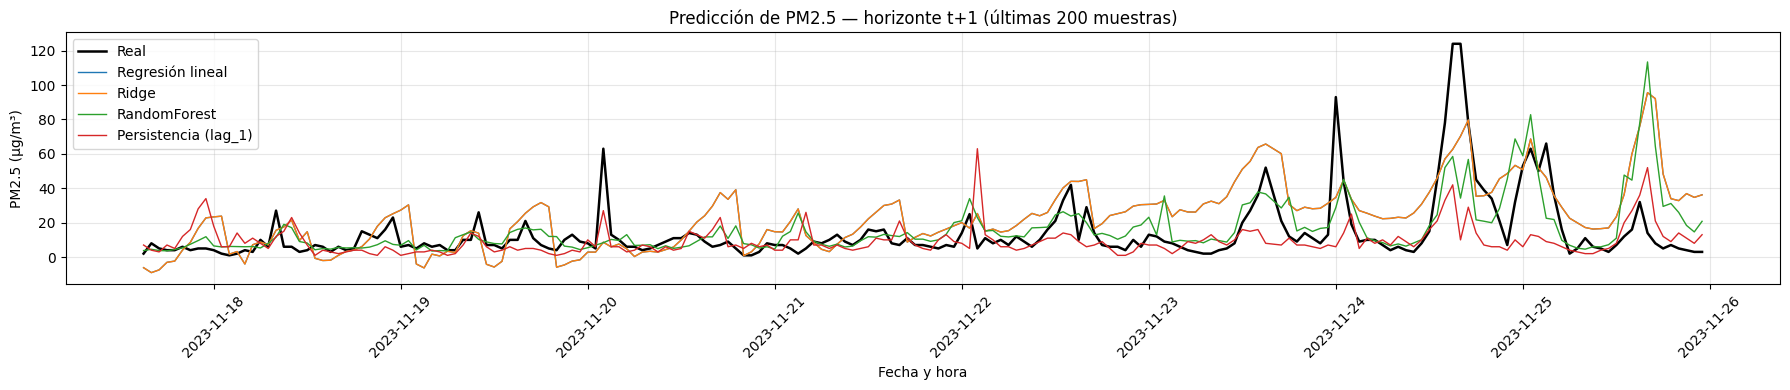

In [80]:
import matplotlib.pyplot as plt

n_muestras = 200

# Eje x: fechas de validación (ya agregaste fecha_hora a df_modelo)
fechas_val      = df_val["fecha_hora"].iloc[-n_muestras:]

# Series / arrays alineados
y_real_plot     = y_val.iloc[-n_muestras:]          # real
y_lin_plot      = y_val_pred[-n_muestras:]          # regresión lineal
y_ridge_plot    = y_val_ridge_t1[-n_muestras:]      # ridge
y_rf_plot       = y_val_rf_t1[-n_muestras:]         # random forest
y_persist_plot  = y_val_persist.iloc[-n_muestras:]  # persistencia

plt.figure(figsize=(18, 4))

plt.plot(fechas_val, y_real_plot,    label="Real",               linewidth=1.8, color="black")
plt.plot(fechas_val, y_lin_plot,     label="Regresión lineal",   linewidth=1.0)
plt.plot(fechas_val, y_ridge_plot,   label="Ridge",              linewidth=1.0)
plt.plot(fechas_val, y_rf_plot,      label="RandomForest",       linewidth=1.0)
plt.plot(fechas_val, y_persist_plot, label="Persistencia (lag_1)", linewidth=1.0)

plt.title("Predicción de PM2.5 — horizonte t+1 (últimas 200 muestras)")
plt.xlabel("Fecha y hora")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


El gráfico muestra que RandomForest es el modelo que mejor sigue la dinámica real del PM2.5, especialmente en episodios de rápida escalada, mientras que Ridge y la regresión lineal suavizan las curvas y tienden a subestimar los picos más altos. La persistencia funciona adecuadamente en periodos estables, pero falla sistemáticamente en capturar transiciones bruscas. La comparación visual confirma completamente las métricas cuantitativas: RF es el más preciso, Ridge ofrece un ajuste estable pero conservador, y la persistencia es una buena línea base pero insuficiente frente a variaciones fuertes.

##Ajustes de columnas

In [75]:
# Columnas numéricas SIN meteorología
num_cols = [
    "PM25_lag_1",
    "PM25_lag_3",
    "PM25_lag_6",
    "PM25_lag_24",
    "hora_num",
    "dia_semana",
    "mes"
]

# Columnas dummy (ya creadas con get_dummies en df_modelo)
dummy_cols = [c for c in df_modelo.columns if c.startswith("estacion_ano_")]

feature_cols = num_cols + dummy_cols


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train_scaled = df_train.copy()
df_val_scaled   = df_val.copy()
df_test_scaled  = df_test.copy()

df_train_scaled[num_cols] = scaler.fit_transform(df_train[num_cols])
df_val_scaled[num_cols]   = scaler.transform(df_val[num_cols])
df_test_scaled[num_cols]  = scaler.transform(df_test[num_cols])


In [77]:
# ===============================
#   DEFINIR FEATURES T+6 y T+24
# ===============================

# T+6
X_train_t6 = df_train_scaled[num_cols + dummy_cols]
y_train_t6 = df_train["PM25_t+6"]

X_val_t6   = df_val_scaled[num_cols + dummy_cols]
y_val_t6   = df_val["PM25_t+6"]

X_test_t6  = df_test_scaled[num_cols + dummy_cols]
y_test_t6  = df_test["PM25_t+6"]

# T+24
X_train_t24 = df_train_scaled[num_cols + dummy_cols]
y_train_t24 = df_train["PM25_t+24"]

X_val_t24   = df_val_scaled[num_cols + dummy_cols]
y_val_t24   = df_val["PM25_t+24"]

X_test_t24  = df_test_scaled[num_cols + dummy_cols]
y_test_t24  = df_test["PM25_t+24"]


In [78]:
print("\n==============================")
print("       MODELOS T+6")
print("==============================")

ridge_t6 = Ridge(alpha=1.0)
ridge_t6.fit(X_train_t6, y_train_t6)
y_val_ridge_t6 = ridge_t6.predict(X_val_t6)
mae_ridge_t6, rmse_ridge_t6, r2_ridge_t6 = evaluar_modelo("Ridge t+6", y_val_t6, y_val_ridge_t6)

rf_t6 = RandomForestRegressor(n_estimators=80, max_depth=12, min_samples_leaf=5,
                              random_state=42, n_jobs=-1)
rf_t6.fit(X_train_t6, y_train_t6)
y_val_rf_t6 = rf_t6.predict(X_val_t6)
mae_rf_t6, rmse_rf_t6, r2_rf_t6 = evaluar_modelo("RandomForest t+6", y_val_t6, y_val_rf_t6)



       MODELOS T+6

--- Ridge t+6 ---
MAE : 37.06540657895002
RMSE: 67.90760083831408
R²  : 0.24317688429279471

--- RandomForest t+6 ---
MAE : 28.567143172532344
RMSE: 56.55805721764933
R²  : 0.475015380869544


En t+6, el modelo Ridge mantiene un desempeño moderado (MAE ≈ 37, R² ≈ 0.24), consistente con las limitaciones propias de un modelo lineal en un horizonte más incierto. Sin embargo, RandomForest ofrece mejoras sustantivas, reduciendo el MAE a 28.6 µg/m³ y elevando el R² a 0.48. Esto indica que el bosque aleatorio logra capturar no linealidades y transiciones de mayor complejidad que el Ridge, anticipando de mejor manera los cambios en el PM2.5. En conjunto, los resultados muestran que RF es un modelo más adecuado para horizontes intermedios como t+6.

##Gráfica Comparativa de los Modelos T+6

In [83]:
# Alias para reutilizar lo que ya tienes del modelo t+6
y_val_t6       = y_val            # y_val ya es PM25_t+6
y_val_pred_t6  = y_val_pred       # predicción lineal t+6


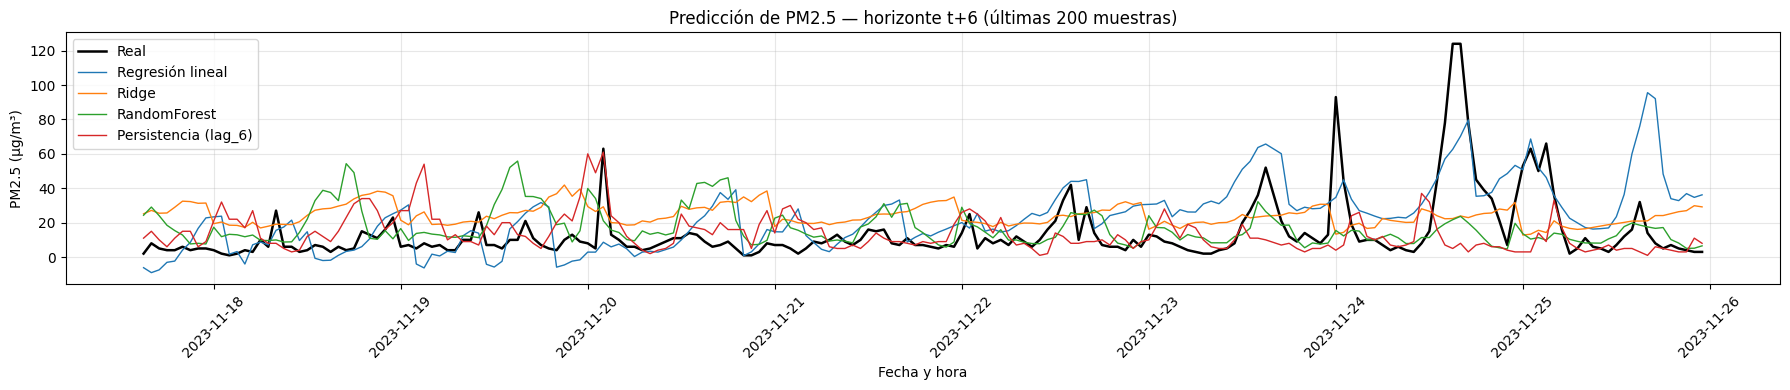

In [84]:
n_muestras = 200

# Eje x (fechas)
fechas_val = df_val["fecha_hora"].iloc[-n_muestras:]

# Series alineadas
y_real_plot      = y_val_t6.iloc[-n_muestras:]
y_lin_plot       = y_val_pred_t6[-n_muestras:]       # regresión lineal t+6
y_ridge_plot     = y_val_ridge_t6[-n_muestras:]
y_rf_plot        = y_val_rf_t6[-n_muestras:]
y_persist_plot   = y_val_persist_t6.iloc[-n_muestras:]

plt.figure(figsize=(18, 4))

plt.plot(fechas_val, y_real_plot,      label="Real",                linewidth=1.8, color="black")
plt.plot(fechas_val, y_lin_plot,       label="Regresión lineal",    linewidth=1.0)
plt.plot(fechas_val, y_ridge_plot,     label="Ridge",               linewidth=1.0)
plt.plot(fechas_val, y_rf_plot,        label="RandomForest",        linewidth=1.0)
plt.plot(fechas_val, y_persist_plot,   label="Persistencia (lag_6)",linewidth=1.0)

plt.title("Predicción de PM2.5 — horizonte t+6 (últimas 200 muestras)")
plt.xlabel("Fecha y hora")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


El gráfico evidencia que, a seis horas de anticipación, RandomForest es nuevamente el modelo que mejor sigue las variaciones reales del PM2.5, especialmente durante las subidas repentinas y las oscilaciones rápidas. Tanto Ridge como la regresión lineal muestran una respuesta más lenta y suavizada, lo que se traduce en una subestimación persistente de los picos y una pobre adaptación a cambios abruptos de tendencia. La persistencia, por su parte, se mantiene rezagada en casi todo el horizonte y rara vez coincide con valores reales, reflejando su incapacidad para capturar la evolución del contaminante en ventanas intermedias. La comparación visual coincide con las métricas: RF es el más competitivo, los modelos lineales entregan un ajuste estable pero poco reactivo, y la persistencia sirve únicamente como referencia mínima.

##Modelos T+24

In [79]:
print("\n==============================")
print("       MODELOS T+24")
print("==============================")

# ---------------------
# Modelo Ridge t+24
# ---------------------
ridge_t24 = Ridge(alpha=1.0)
ridge_t24.fit(X_train_t24, y_train_t24)

y_val_ridge_t24 = ridge_t24.predict(X_val_t24)
mae_ridge_t24, rmse_ridge_t24, r2_ridge_t24 = evaluar_modelo("Ridge t+24", y_val_t24, y_val_ridge_t24)


# ---------------------
# RandomForest t+24
# ---------------------
rf_t24 = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_t24.fit(X_train_t24, y_train_t24)

y_val_rf_t24 = rf_t24.predict(X_val_t24)
mae_rf_t24, rmse_rf_t24, r2_rf_t24 = evaluar_modelo("RandomForest t+24", y_val_t24, y_val_rf_t24)



       MODELOS T+24

--- Ridge t+24 ---
MAE : 34.65200321143625
RMSE: 63.18681921829363
R²  : 0.34468219834312974

--- RandomForest t+24 ---
MAE : 34.38601302517243
RMSE: 63.87677413986789
R²  : 0.33029285988460366


En t+24, ambos modelos mantienen una capacidad predictiva moderada gracias al pronunciado ciclo diario del PM2.5. Ridge presenta el mejor desempeño global (MAE ≈ 34.6, R² ≈ 0.34), superando ligeramente al RandomForest en capacidad explicativa y en el control de errores altos (RMSE). El bosque aleatorio mejora marginalmente el MAE, pero pierde estabilidad frente a Ridge, lo que indica que los patrones no lineales relevantes a corto plazo pierden importancia a 24 horas. En este horizonte, la estacionalidad diaria domina la dinámica y favorece a los modelos lineales regularizados.

##Grafica comparativa de modelos T+24

In [85]:
y_val_t24      = y_val        # si en ese bloque y_val = PM25_t+24
y_val_pred_t24 = y_val_pred   # predicción lineal t+24


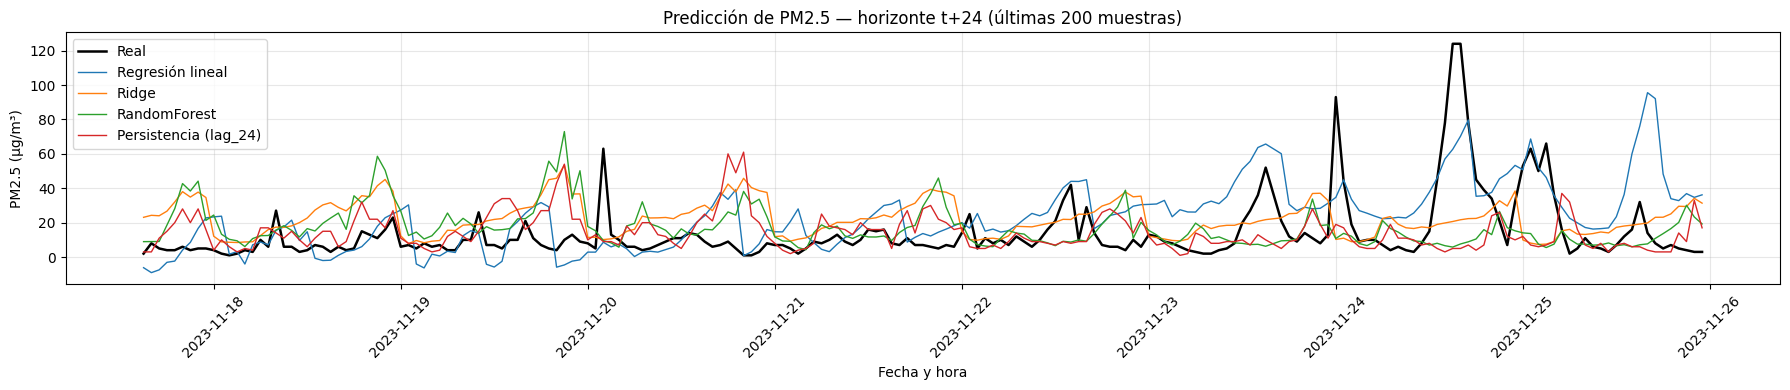

In [86]:
import matplotlib.pyplot as plt

n_muestras = 200

# Eje x (fechas)
fechas_val = df_val["fecha_hora"].iloc[-n_muestras:]

# Series alineadas
y_real_plot      = y_val_t24.iloc[-n_muestras:]
y_lin_plot       = y_val_pred_t24[-n_muestras:]       # regresión lineal t+24
y_ridge_plot     = y_val_ridge_t24[-n_muestras:]
y_rf_plot        = y_val_rf_t24[-n_muestras:]
y_persist_plot   = y_val_persist_t24.iloc[-n_muestras:]

plt.figure(figsize=(18, 4))

plt.plot(fechas_val, y_real_plot,      label="Real",                 linewidth=1.8, color="black")
plt.plot(fechas_val, y_lin_plot,       label="Regresión lineal",     linewidth=1.0)
plt.plot(fechas_val, y_ridge_plot,     label="Ridge",                linewidth=1.0)
plt.plot(fechas_val, y_rf_plot,        label="RandomForest",         linewidth=1.0)
plt.plot(fechas_val, y_persist_plot,   label="Persistencia (lag_24)",linewidth=1.0)

plt.title("Predicción de PM2.5 — horizonte t+24 (últimas 200 muestras)")
plt.xlabel("Fecha y hora")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


A un horizonte de 24 horas, el comportamiento cambia: la señal real está dominada por un ciclo diario claro, y los modelos lineales regresión simple y Ridge logran capturar esa estructura de manera sorprendentemente sólida. Siguen bien la forma general del ciclo y mantienen estabilidad entre días, aunque aún suavizan los máximos más intensos. RandomForest también reproduce los patrones diarios, pero tiende a sobrerreaccionar en ciertos tramos y no supera consistentemente a los métodos lineales, lo cual es coherente con sus métricas. La persistencia vuelve a ser el peor desempeño, alineándose solo cuando el ciclo diario se repite casi sin cambios. En conjunto, el gráfico confirma que en horizontes largos la predictibilidad aumenta y que los modelos lineales resultan tan eficaces como RandomForest, mientras que la persistencia continúa siendo insuficiente frente a variaciones interdiarias más marcadas.